# Computational tools for data science - project

Laoading data and first exploratory analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix = pd.read_csv('data/netflix.csv')
amazon = pd.read_csv('data/amazon.csv')
hulu = pd.read_csv('data/hulu.csv')
apple = pd.read_csv('data/apple.csv')
hbo = pd.read_csv('data/hbo.csv')

main = pd.read_csv('data/TMDB_all_movies.csv')

In [ ]:
main.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,suomi,"Tomi Salmela, Jaakko Talaskivi, Hannu Kivisalo...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,"suomi, English, svenska","Kati Outinen, Ulla Kuosmanen, Jaakko Talaskivi...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Rodrigo García, Guillermo Navarro, Phil Parmet...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,English,"Christine Harnos, Lauren Robinson, Deirdre Kel...",Stephen Hopkins,Peter Levy,"Lewis Colick, Jere Cunningham","Lloyd Segan, Gene Levy, Marilyn Vance",Alan Silvestri,6.6,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg


In [ ]:
netflix.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315661.0,MX
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,516953.0,"AT, CH, DE"
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221506.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211503.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BG, BH..."
4,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443687.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."


In [ ]:
# Remove TV shows (we only want movies)
def remove_tv_show(df):
    return df[df['type'] == 'movie']

print('Before removing shows')
print(netflix.shape)
print(amazon.shape)
print(hulu.shape)
print(apple.shape)
print(hbo.shape)

netflix = remove_tv_show(netflix)
apple = remove_tv_show(apple)
hulu = remove_tv_show(hulu)
amazon = remove_tv_show(amazon)
hbo = remove_tv_show(hbo)

#dimension of the dataset
print('After removing shows')
print(netflix.shape)
print(amazon.shape)
print(hulu.shape)
print(apple.shape)
print(hbo.shape)

Before removing shows
(20106, 8)
(66905, 8)
(9753, 8)
(17648, 8)
(7017, 8)
After removing shows
(15499, 8)
(58559, 8)
(5915, 8)
(13598, 8)
(3653, 8)


In [ ]:
#add platform column to main dataset
def platform_column(main, platform, platform_name):
    for index, row in main.iterrows():
        if row['title'] in platform['title'].values: 
            main.loc[index, platform_name] = 1
        else:
            main.loc[index, platform_name] = 0
    return main

In [ ]:
#main_netflix = platform_column(main, netflix, 'Netflix')
#main_net_ama = platform_column(main_netflix, amazon, 'Amazon')
#main_net_ama_hulu = platform_column(main_net_ama, hulu, 'Hulu')
#main_net_ama_hulu_apple = platform_column(main_net_ama_hulu, apple, 'Apple')
#main_complete = platform_column(main_net_ama_hulu_apple, hbo, 'HBO')


In [36]:
# load dataset
main_complete = pd.read_csv('data/main_complete.csv')
main_complete.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,producers,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Apple,HBO
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,Aki Kaurismäki,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,0.0,1.0,1.0,0.0,0.0
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,Mika Kaurismäki,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,0.0,1.0,1.0,0.0,0.0
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,"Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,0.0,1.0,0.0,1.0,0.0
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,"Lloyd Segan, Gene Levy, Marilyn Vance",Alan Silvestri,6.6,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg,0.0,1.0,0.0,0.0,0.0
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,"Ulrich Gehmacher, Timo Novotny",NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg,0.0,0.0,0.0,0.0,0.0


To not run

In [3]:
#count the number of movies in each platform
def count_movies(df, platform_name):
    return df[platform_name].sum()

In [4]:
netflix_count = count_movies(main_complete, 'Netflix')
print(netflix_count)
amazon_count = count_movies(main_complete, 'Amazon')
print(amazon_count)
hulu_count = count_movies(main_complete, 'Hulu')
print(hulu_count)
apple_count = count_movies(main_complete, 'Apple')
print(apple_count)
hbo_count = count_movies(main_complete, 'HBO')
print(hbo_count)

36998.0
108669.0
15330.0
32572.0
10606.0


In [5]:
#count the number of movies in more than one platform (take in consideration two, three and four platforms)
count = 0
for index, row in main_complete.iterrows():
    if row['Netflix'] + row['Amazon'] + row['Hulu'] + row['Apple'] + row['HBO']> 1:
        count += 1
print(count)

45205


In [6]:
#identify which movies are in more than one platform
def more_than_one_platform(df):
    return df[(df['Netflix'] + df['Amazon'] + df['Hulu'] + df['Apple'] + df['HBO']) > 1]

in_platforms = more_than_one_platform(main_complete)

In [7]:
in_platforms

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,producers,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Apple,HBO
0,2,Ariel,7.100,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,Aki Kaurismäki,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,0.0,1.0,1.0,0.0,0.0
1,3,Shadows in Paradise,7.300,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,Mika Kaurismäki,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,0.0,1.0,1.0,0.0,0.0
2,5,Four Rooms,5.800,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,"Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,0.0,1.0,0.0,1.0,0.0
8,13,Forrest Gump,8.473,27309.0,Released,1994-06-23,677387716.0,142.0,55000000.0,tt0109830,...,"Steve Tisch, Steve Starkey, Wendy Finerman",Alan Silvestri,8.8,2313221.0,/arw2vcBveWOVZr6pxd9XTd1TdQa.jpg,1.0,1.0,1.0,1.0,0.0
10,15,Citizen Kane,8.007,5456.0,Released,1941-04-17,23218000.0,119.0,839727.0,tt0033467,...,Orson Welles,Bernard Herrmann,8.3,472546.0,/sav0jxhqiH0bPr2vZFU0Kjt2nZL.jpg,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009409,1378846,Daredevil,0.000,0.0,Released,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,/4qnJSWiJLBLKMWxTRccW85ePvZM.jpg,0.0,1.0,1.0,0.0,1.0
1009575,1379030,Promises,0.000,0.0,Released,2024-10-29,0.0,9.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0
1009798,1379281,Elysium,0.000,0.0,Released,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0
1009803,1379287,Moving On,0.000,0.0,Released,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0


Run again

In [37]:
main_complete.dtypes

id                           int64
title                       object
vote_average               float64
vote_count                 float64
status                      object
release_date                object
revenue                    float64
runtime                    float64
budget                     float64
imdb_id                     object
original_language           object
original_title              object
overview                    object
popularity                 float64
tagline                     object
genres                      object
production_companies        object
production_countries        object
spoken_languages            object
cast                        object
director                    object
director_of_photography     object
writers                     object
producers                   object
music_composer              object
imdb_rating                float64
imdb_votes                 float64
poster_path                 object
Netflix             

## Simmilarity

we need to tokenize each feature into sets

for categorical features, we do one-hot encode to represent the presence or absence

 For MinHashing, you need each feature (e.g., genres, cast members) in each row (movie) to be a set of tokens. Convert strings like "Action|Adventure" into sets like {“Action”, “Adventure”}.

### Genres Analysis

In [78]:
# load dataset
main_complete = pd.read_csv('data/main_complete.csv')
# main_complete.head()

In [79]:
from pandas import DataFrame

main_genres = DataFrame()
main_genres = main_complete

In [80]:
# different possible genres in the dataset
main_genres['genres'].unique()
print("There are ", len(main_genres['genres'].unique()), "different genres in the dataset")
print("The genres are:", main_genres['genres'].unique())

main_genres['genres']

# check how many movies have no genre
nulls = main_genres['genres'].isnull().sum()
print("This percentage of movies have no genre:", nulls/len(main_genres)*100)


There are  14303 different genres in the dataset
The genres are: ['Comedy, Drama, Romance, Crime' 'Comedy, Drama, Romance' 'Comedy' ...
 'Romance, History, Music' 'Documentary, Crime, History, Drama'
 'Music, Romance, Adventure, Animation, Fantasy']
This percentage of movies have no genre: 29.076318106153554


We need to create a set with the different genres in each movie

In [81]:
# split the genres into a set of genres and remove spaces
main_genres['genres'] = main_genres['genres'].apply(lambda x: set(genre.strip() for genre in x.split(',')) if pd.notnull(x) else set())

In [ ]:
# THIS IS JUST TO VISUALIZE THE GENRES
# check how many different genres are taking into account the content of the lists
genres = set()
for list in main_genres['genres']:
    # if list is not NaN
    if list is not np.nan:
        for genre in list:
            # remove the space at the beginning of the string if there is one
            genre = genre.strip()
            genres.add(genre)
print("There are ", len(genres), "different genres in the dataset")

There are  19 different genres in the dataset


In [43]:
print("The genres are:", genres)

The genres are: {'Fantasy', 'Music', 'Family', 'Drama', 'Comedy', 'Thriller', 'Mystery', 'Horror', 'Western', 'Adventure', 'War', 'Science Fiction', 'Crime', 'Romance', 'History', 'Animation', 'TV Movie', 'Action', 'Documentary'}


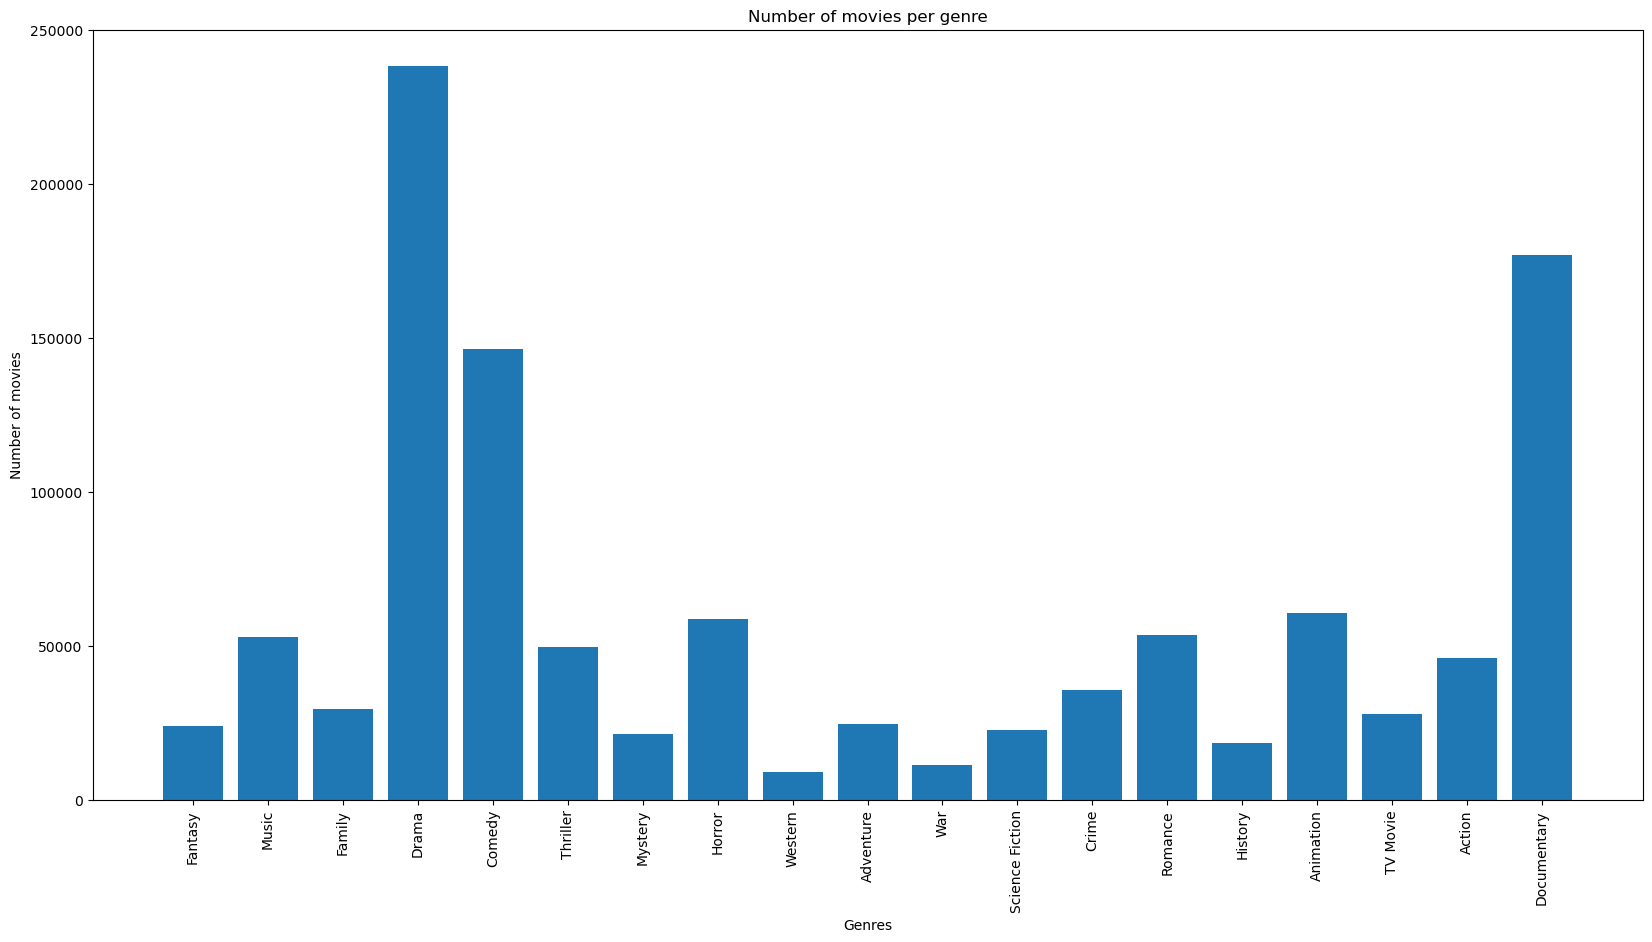

In [ ]:
# THIS IS JUST TO VISUALIZE
# plot the histogram of genres
genres_count = {genre: 0 for genre in genres}
for genre_list in main_genres['genres']:
    if genre_list is not np.nan:
        for genre in genre_list:
            genre = genre.strip()
            genres_count[genre] += 1

# histogram
plt.figure(figsize=(20, 10))
plt.bar(genres_count.keys(), genres_count.values())
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.title('Number of movies per genre')
plt.show()

### Cast and crew

In [82]:
# split the cast into a set of cast and remove spaces
main_genres['cast'] = main_genres['cast'].apply(lambda x: set(actor.strip() for actor in x.split(',')) if pd.notnull(x) else set())

In [83]:
main_genres['cast']

0          {Erkki Pajala, Hanna Jokinen, Marja Packalén, ...
1          {Pekka Laiho, Bertta Pellonpää, Helmeri Pellon...
2          {Tamlyn Tomita, Lana McKissack, Antonio Bander...
3          {Doug Wert, Emilio Estevez, Everlast, Deirdre ...
4                                                         {}
                                 ...                        
1009834                                                   {}
1009835                                                   {}
1009836                                                   {}
1009837    {Johannes Frolich, Vicky Krieps, Lydia Stevens...
1009838    {Pamela Adlon, Dennis Singletary, Jon Bailey, ...
Name: cast, Length: 1009839, dtype: object

In [ ]:
# main_genres['cast']

# # split the cast into a list of actors
# main_genres['cast'] = main_genres['cast'].str.split(',')


# # check how many different actors are taking into account the content of the lists
# actors = set()
# for list in main_genres['cast']:
#     # if list is not NaN
#     if list is not np.nan:
#         for actor in list:
#             # remove the space at the beginning of the string if there is one
#             actor = actor.strip()
#             actors.add(actor)
# actors.remove('')
# print("There are ", len(actors), "different actors in the dataset")

In [84]:
# how many movies have no cast
nulls = main_genres['cast'].apply(lambda x: len(x) == 0).sum()
print("This percentage of movies have no cast:", nulls/len(main_genres)*100)

This percentage of movies have no cast: 33.29124741666741


create a column called "crew" with sets of director, director_of_photography, writers, music_composer and producers. Remove the columns of these ones

In [86]:
columns_to_merge = ['director', 'director_of_photography', 'writers', 'music_composer', 'producers']

for column in columns_to_merge:
    main_genres[column] = main_genres[column].apply(lambda x: set(person.strip() for person in x.split(',')) if pd.notnull(x) else set())

main_genres['crew'] = main_genres.apply(lambda row: set.union(row['director'], row['director_of_photography'], row['writers'], row['music_composer'], row['producers']), axis=1)

# Drop the individual columns
main_genres.drop(columns=columns_to_merge, inplace=True)

main_genres['crew']

0                            {Timo Salminen, Aki Kaurismäki}
1           {Mika Kaurismäki, Timo Salminen, Aki Kaurismäki}
2          {Rodrigo García, Guillermo Navarro, Quentin Ta...
3          {Lewis Colick, Alan Silvestri, Stephen Hopkins...
4          {Wolfgang Thaler, Ulrich Gehmacher, Timo Novot...
                                 ...                        
1009834                                                   {}
1009835                                                   {}
1009836                                                   {}
1009837    {Nicolas Steil, Torsten Wenzel, Florian Gallen...
1009838    {Brian Goldner, Enrique Chediak, Lorenzo di Bo...
Name: crew, Length: 1009839, dtype: object

In [87]:
main_genres['crew'][2]

{'Alexandre Rockwell',
 'Allison Anders',
 'Andrzej Sekula',
 'Combustible Edison',
 'Guillermo Navarro',
 'Lawrence Bender',
 'Phil Parmet',
 'Quentin Tarantino',
 'Robert Rodriguez',
 'Rodrigo García'}

## Sentiment Analysis

Overview and title Analysis